# **Stroke Prediction Using Machine Learning**

#### This project is an attempt to build a machine learning model to predict the chances of stroke to a user.
#### The model will consist of a front-end GUI for collecting data. Flask file to connect the model to backend model.
#### For the backend model we will be comparining 10 different ML algorithms for their accuracy. Select the best one and perform k-fold validation and hyper-parameter optimization on it.

### Contents
Here we will link every step that we took for selecting our backend model

# 0. Importing the Necessary Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn 
import graphviz 
import os
import preprocessing 
import plotly as py
from pandas_profiling import ProfileReport
import warnings


---

# 1. Importing and Exploring Dataset

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk("C:\\Users\\msn21\\Desktop\\Major Project\\Stroke\\dataset\\"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4020658627.py, line 5)

In [3]:
dataset = pd.read_csv('C:\Users\VARSHA AKKALA\Desktop\Stroke-Prediction-Using-Machine-Learning-main\dataset\healthcare-dataset-stroke-data.csv')
dataset.sample(10)

id  gender   age  hypertension  heart_disease ever_married  \
2872  41413  Female  75.0             0              1          Yes   
40      545    Male  42.0             0              0          Yes   
4043  57539  Female  68.0             0              0          Yes   
604    8122  Female  37.0             0              0          Yes   
4651  66315  Female  57.0             0              0           No   
545    7411    Male  82.0             0              0          Yes   
4573  65376  Female  65.0             0              0          Yes   
3401  49057  Female  32.0             0              0           No   
312    4538  Female  29.0             0              0           No   
3712  53016  Female   1.8             0              0           No   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
2872  Self-employed          Rural             243.53  27.0     never smoked   
40          Private          Rural             210.48  71.9     never smoked   
4043        Private          Rural             233.59  43.9     never smoked   
604         Private          Urban              94.12  34.2          Unknown   
4651  Self-employed          Urban              68.02  37.5     never smoked   
545         Private          Urban             214.42  33.9  formerly smoked   
4573  Self-employed          Urban              95.44  25.5           smokes   
3401        Private          Rural              67.92  22.8           smokes   
312         Private          Urban              81.43   NaN  formerly smoked   
3712       children          Urban             130.61  14.4          Unknown   

      stroke  
2872       0  
40         0  
4043       0  
604        0  
4651       1  
545        0  
4573       0  
3401       0  
312        0  
3712       0

### Dropping column 'id' as it can cause unwanted correlation.

In [4]:
dataset.drop("id", axis=1, inplace=True)

In [5]:
dataset.sample(5)

gender   age  hypertension  heart_disease ever_married      work_type  \
1450    Male  82.0             0              1          Yes       Govt_job   
2443  Female  48.0             0              0          Yes        Private   
1993    Male  66.0             0              0          Yes        Private   
513   Female  52.0             0              0          Yes  Self-employed   
1932  Female  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1450          Rural             103.68  25.0   never smoked       1  
2443          Urban             112.96  25.4   never smoked       0  
1993          Urban             247.48  33.5         smokes       0  
513           Urban             113.21  38.3   never smoked       0  
1932          Rural              82.93  29.7         smokes       0

## Variable Description

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### We have null variables in 'bmi' column. We will handle them after.

<a id="4"></a> 
## Univariate Variable Analysis

* **Categorical Variables:** 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

* **Numerical Variables:** 'id', 'hypertension', 'heart_disease', 'stroke'

<a id="5"></a> 
### Categorical Variables

In [7]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [8]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


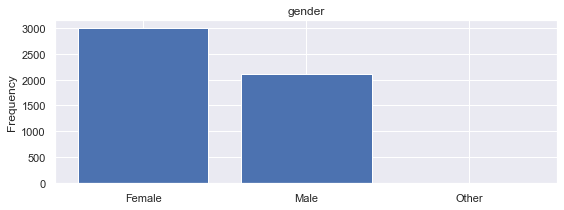

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


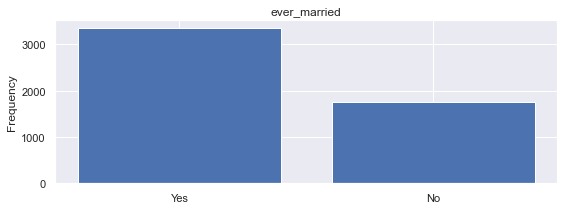

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


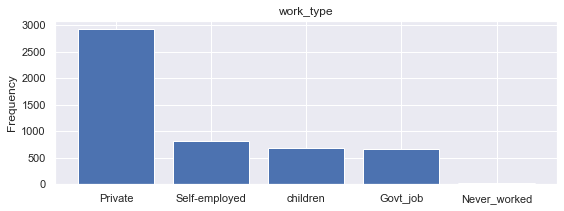

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


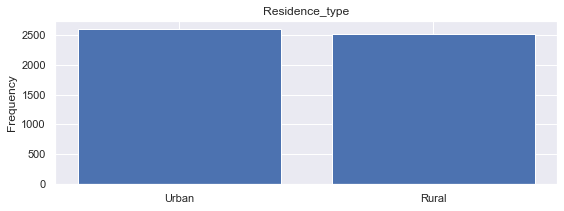

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


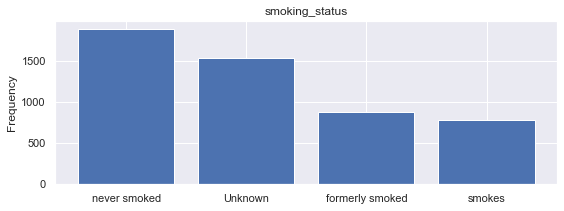

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [9]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

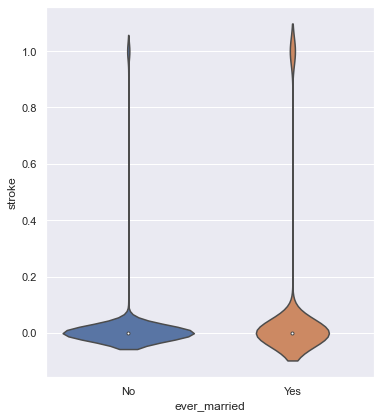

In [10]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)


<a id="6"></a> 
### Numerical Variables

In [11]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

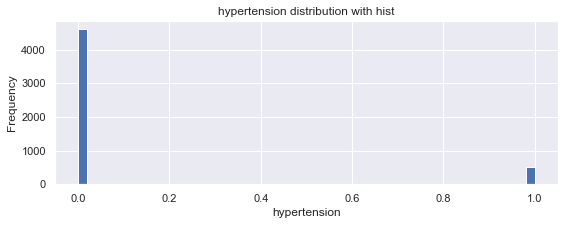

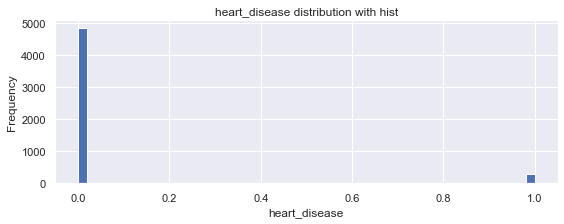

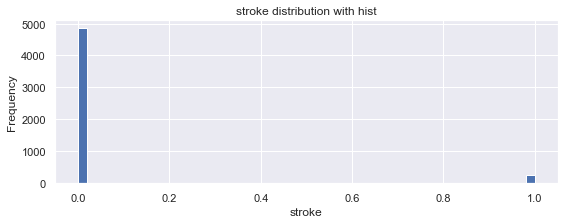

In [13]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

In [14]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


In [15]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

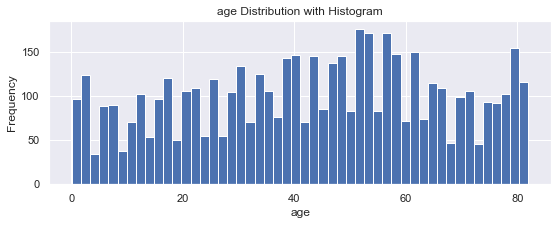

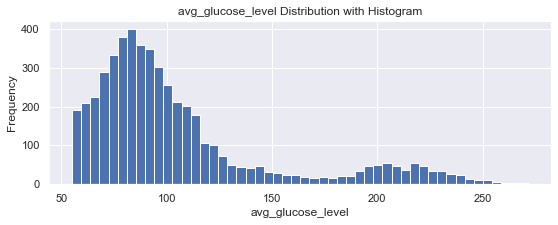

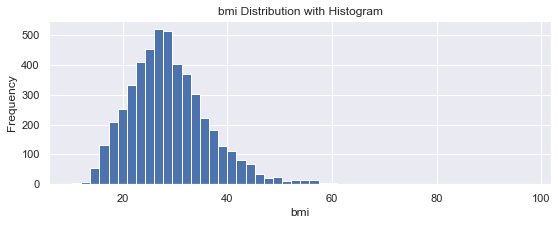

In [16]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

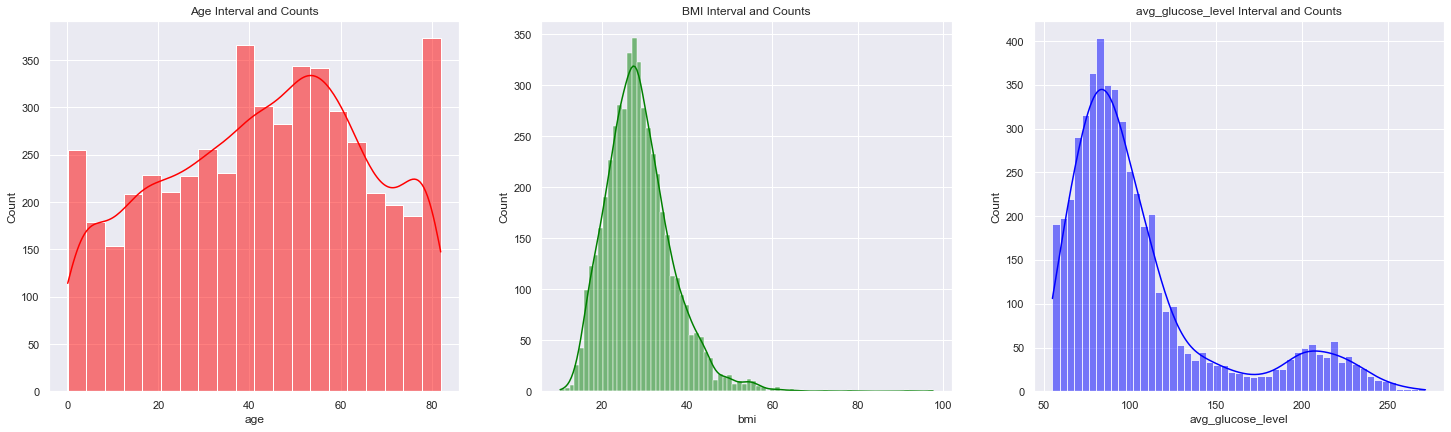

In [17]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['age'], color = 'red', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts')


Text(0.5, 1.0, 'Stroke Interval and Counts')

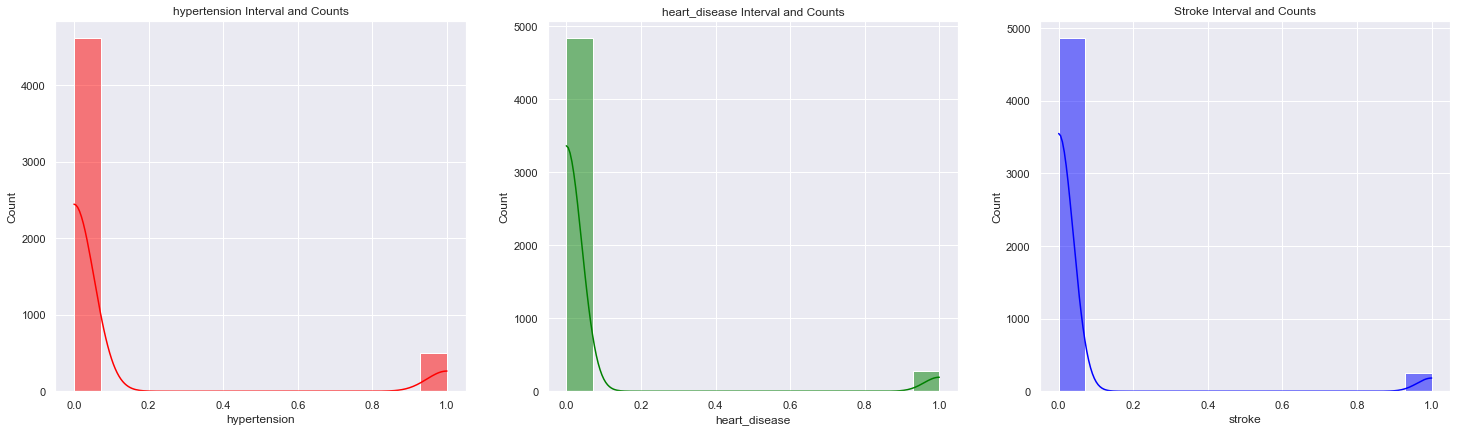

In [18]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['stroke'], kde = True, color = 'blue').set_title('Stroke Interval and Counts')

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

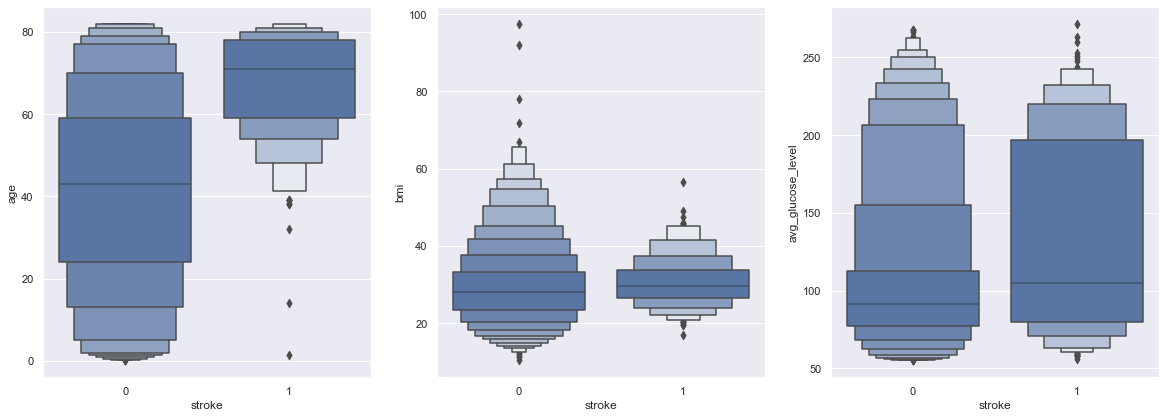

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['stroke'], y=dataset['age'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['stroke'], y=dataset['bmi'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['stroke'], y=dataset['avg_glucose_level'],
              color="b", 
              scale="linear", data=dataset)

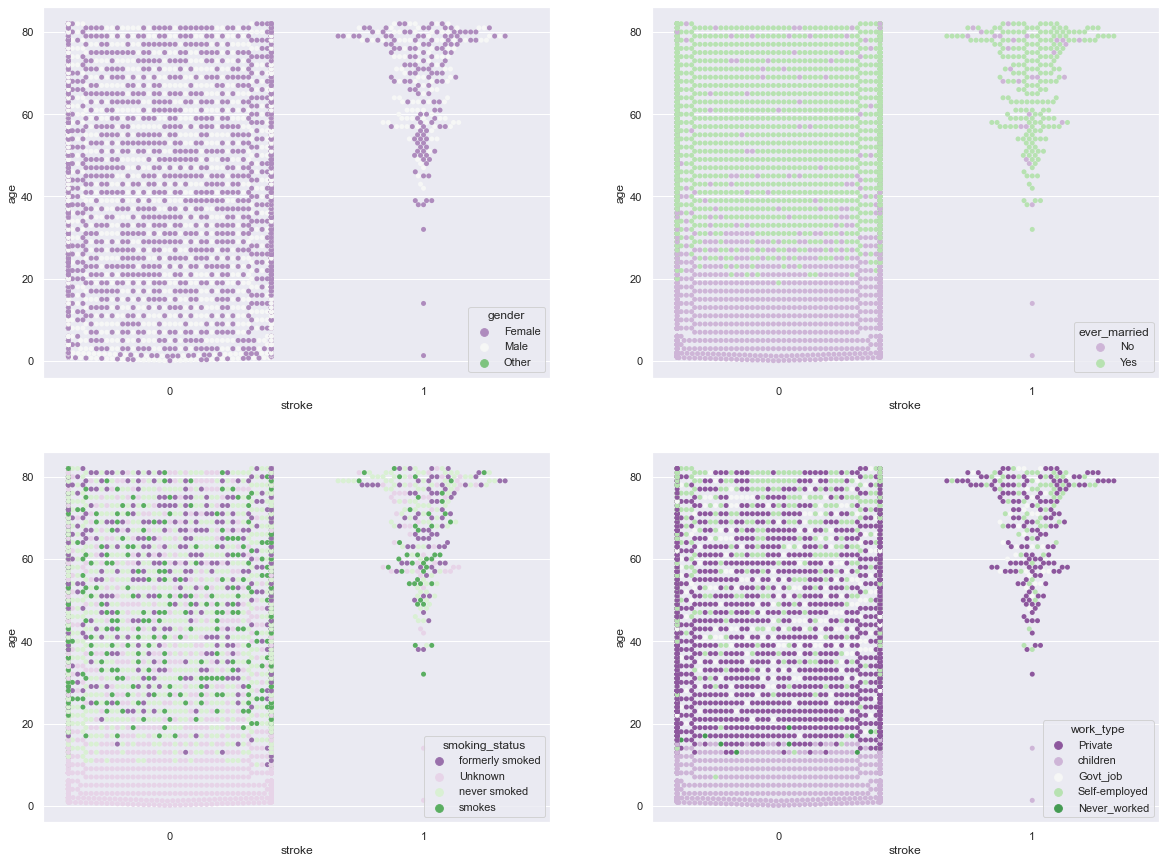

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=dataset, palette="PRGn")

plt.subplot(2,2,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=dataset, palette="PRGn")

plt.subplot(2,2,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=dataset, palette="PRGn")

plt.subplot(2,2,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=dataset, palette="PRGn")

plt.show()

---

# 2. Basic Data Analysis

<a id="8"></a> 
## Gender - Stroke

#### Average stroke rate by gender. Male's stroke rate is higher.

In [21]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

gender    stroke
1    Male  0.051064
0  Female  0.047094
2   Other  0.000000

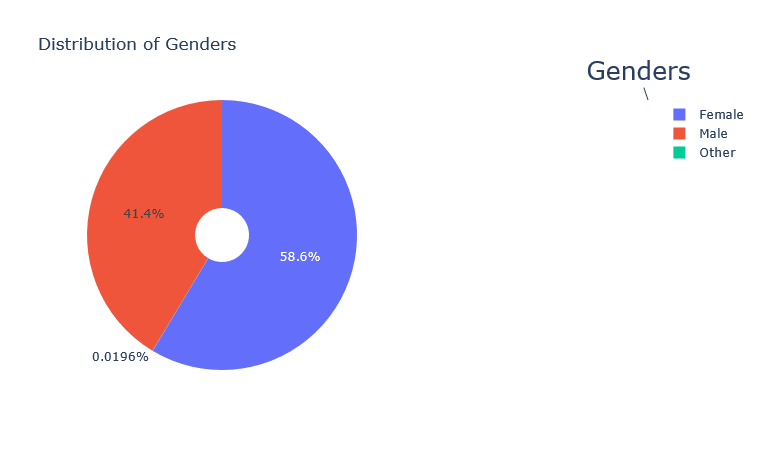

In [22]:
df = dataset

labels = dataset['gender'].value_counts().index
pie1 = dataset['gender'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Genders",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Genders",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)
# plotly was not working in my system, so I made the pie using plt.

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Genders",color = 'black',fontsize = 15)

<a id="9"></a> 
## Ever Married - Stroke

#### stroke rate based on married or not

In [23]:
dataset[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

ever_married    stroke
1          Yes  0.065613
0           No  0.016505

Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

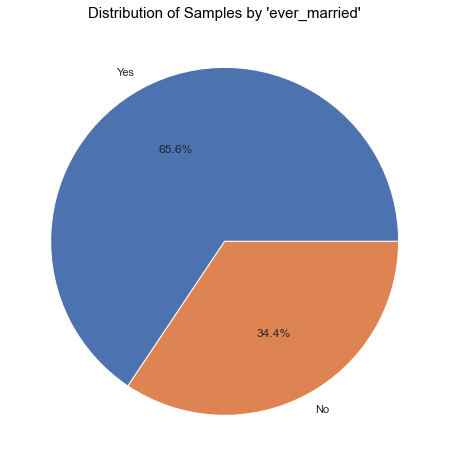

In [24]:
labels = dataset['ever_married'].value_counts().index
sizes = dataset['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

<a id="10"></a> 
## Work Type - Stroke

#### stroke rate based on work_type

In [25]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

work_type    stroke
3  Self-employed  0.079365
2        Private  0.050940
0       Govt_job  0.050228
4       children  0.002911
1   Never_worked  0.000000

In [26]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

work_type  stroke
2        Private    2925
3  Self-employed     819
4       children     687
0       Govt_job     657
1   Never_worked      22

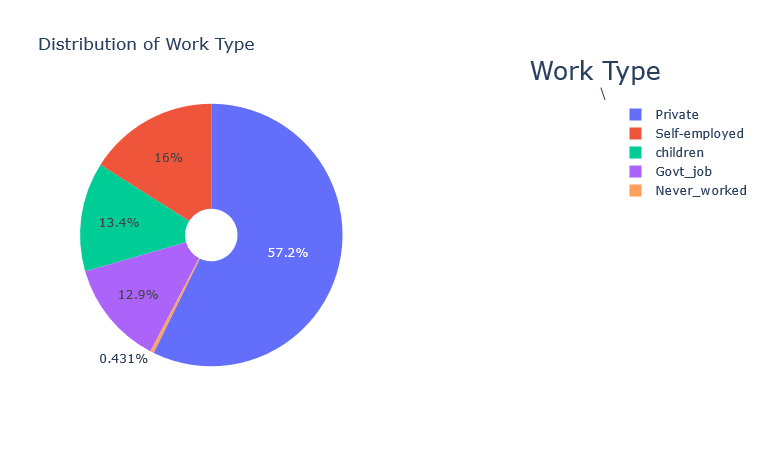

In [27]:
df = dataset

labels = dataset['work_type'].value_counts().index
pie1 = dataset['work_type'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Work Type",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Work Type",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Work Types",color = 'black',fontsize = 15)

<a id="11"></a> 
## Residence_type - Stroke

#### stroke rate based on residence type.

In [28]:
dataset[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

Residence_type    stroke
1          Urban  0.052003
0          Rural  0.045346

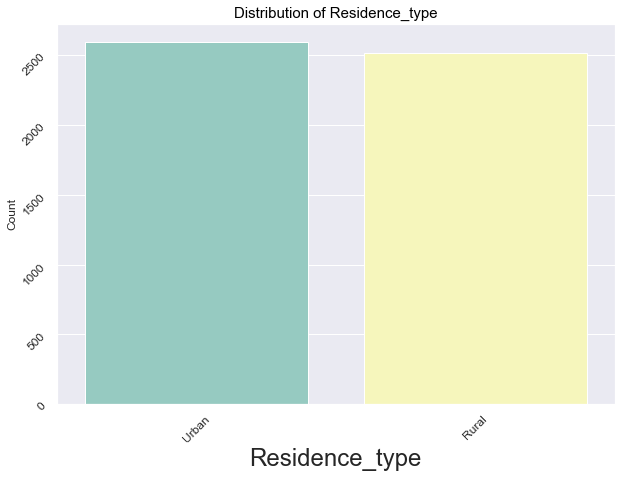

In [29]:
counts = dataset['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

<a id="12"></a> 
## smoking_status - Stroke

In [30]:
dataset[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

smoking_status    stroke
1  formerly smoked  0.079096
3           smokes  0.053232
2     never smoked  0.047569
0          Unknown  0.030440

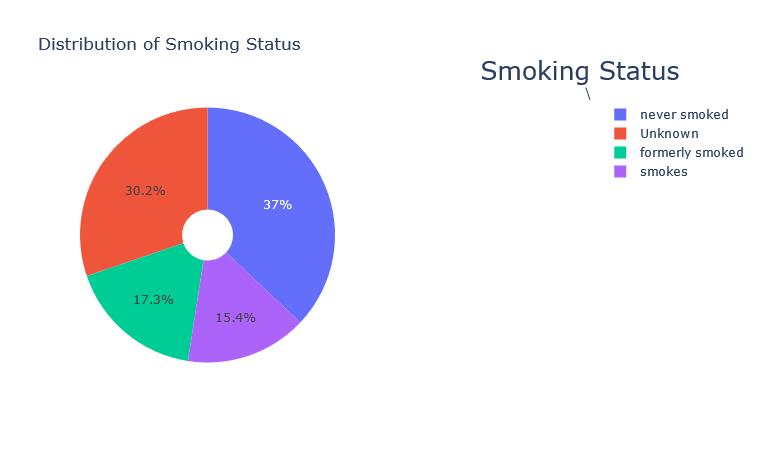

In [31]:
df = dataset

labels = dataset['smoking_status'].value_counts().index
pie1 = dataset['smoking_status'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Smoking Status",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Smoking Status",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Smoking Status",color = 'black',fontsize = 15)

---

<a id="13"></a> 
# 3. Pandas Profiling

#### Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [32]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

<a id="14"></a> 
# 4. Correlation

#### Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

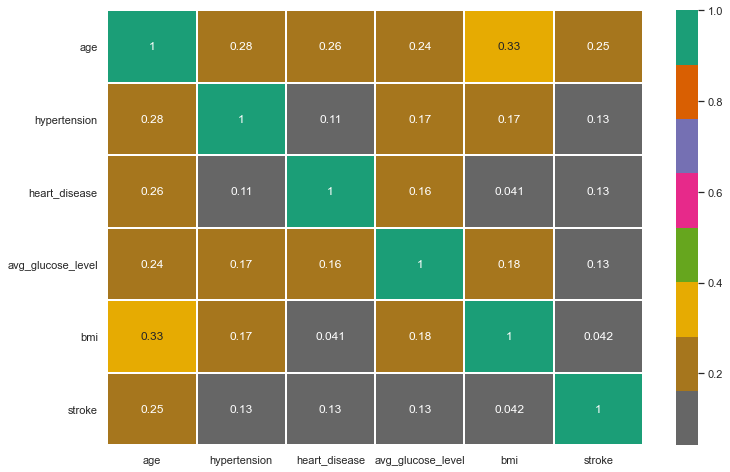

In [33]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

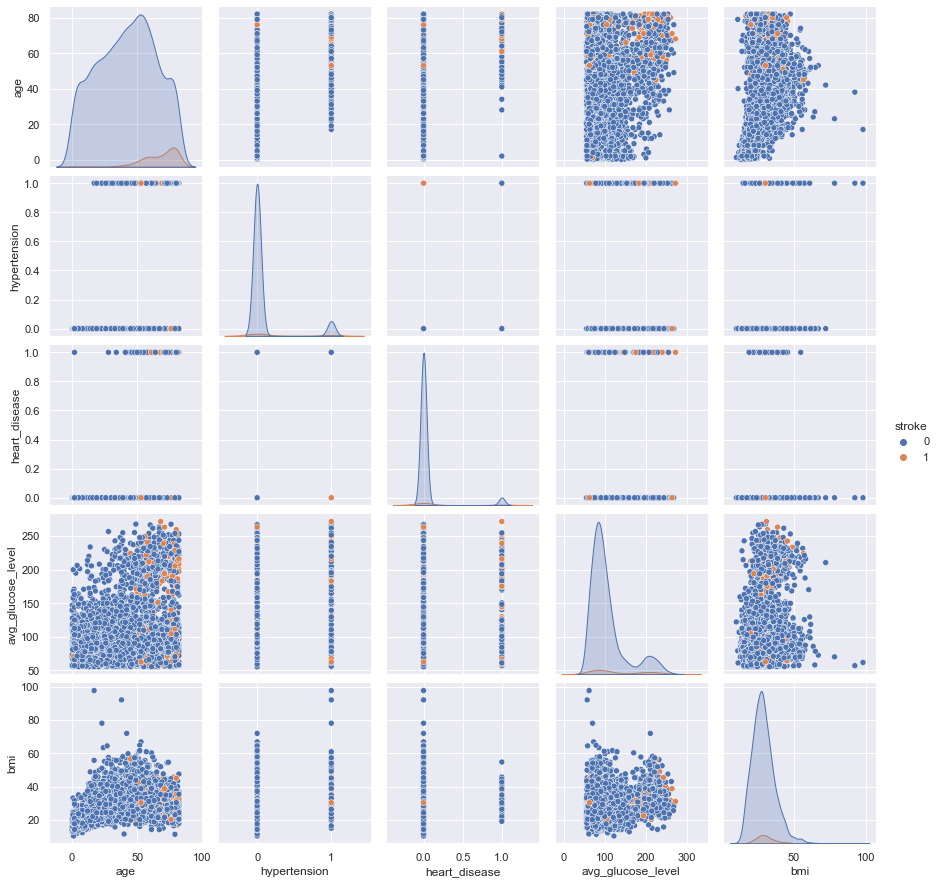

In [34]:
sns.pairplot(dataset, hue = 'stroke')

---

<a id="15"></a> 
# 5. Anomaly Detection

#### Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [35]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [36]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

gender   age  hypertension  heart_disease ever_married      work_type  \
16      Male  59.0             1              1          Yes        Private   
114   Female  79.0             1              0          Yes  Self-employed   
159   Female  67.0             1              0          Yes        Private   
192     Male  73.0             1              1          Yes  Self-employed   
366   Female  54.0             1              0          Yes       Govt_job   
...      ...   ...           ...            ...          ...            ...   
49    Female  82.0             1              1           No        Private   
1971    Male  61.0             1              1          Yes        Private   
2610  Female  69.0             1              1           No  Self-employed   
3766    Male  74.0             1              1          Yes        Private   
4255  Female  79.0             1              1           No  Self-employed   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
16            Rural             246.53  27.2  formerly smoked       0  
114           Rural             174.12  24.0     never smoked       1  
159           Rural             179.12  28.1  formerly smoked       1  
192           Rural             230.68  37.7          Unknown       0  
366           Urban             180.93  27.7     never smoked       1  
...             ...                ...   ...              ...     ...  
49            Rural              84.03  26.5  formerly smoked       1  
1971          Urban             112.24  37.4           smokes       1  
2610          Urban              72.17  36.8     never smoked       1  
3766          Rural              70.09  27.4     never smoked       1  
4255          Rural              60.94   NaN     never smoked       1  

[75 rows x 11 columns]

In [37]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [38]:
dataset

gender   age  hypertension  heart_disease ever_married work_type  \
0     Female  17.0             0              0           No   Private   
1     Female  13.0             0              0           No  children   
2       Male  55.0             0              0          Yes   Private   
3     Female  42.0             0              0           No   Private   
4     Female  31.0             0              0           No   Private   
...      ...   ...           ...            ...          ...       ...   
5030  Female  57.0             1              0          Yes   Private   
5031  Female  19.0             0              0           No   Private   
5032  Female  45.0             0              0          Yes   Private   
5033  Female  53.0             1              0          Yes   Private   
5034  Female   2.0             0              0           No  children   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban              92.97   NaN  formerly smoked       0  
1             Rural              85.81  18.6          Unknown       0  
2             Urban              89.17  31.5     never smoked       0  
3             Urban              98.53  18.5     never smoked       0  
4             Urban             108.89  52.3          Unknown       0  
...             ...                ...   ...              ...     ...  
5030          Rural             129.54  60.9           smokes       0  
5031          Urban              90.57  24.2          Unknown       0  
5032          Urban             172.33  45.3  formerly smoked       0  
5033          Urban              62.55  30.3          Unknown       1  
5034          Urban             102.92  17.6          Unknown       0  

[5035 rows x 11 columns]

---

<a id="16"></a> 
# 6. Missing Values

#### We have 201 null values in total. bmi includes all. (After Anomaly Detection, it decreases to 192)

<a id="17"></a> 
## bmi

In [39]:
dataset[dataset['bmi'].isnull()]

gender    age  hypertension  heart_disease ever_married      work_type  \
0     Female  17.00             0              0           No        Private   
5     Female  38.00             0              0          Yes        Private   
7     Female  80.00             0              0          Yes       Govt_job   
10      Male  43.00             0              0          Yes       Govt_job   
11      Male   8.00             0              0           No       children   
...      ...    ...           ...            ...          ...            ...   
4776    Male  59.00             0              0          Yes        Private   
4821  Female   1.32             0              0           No       children   
4836    Male  58.00             0              0          Yes        Private   
4873  Female  76.00             0              0          Yes       Govt_job   
4982  Female  47.00             0              0          Yes  Self-employed   

     Residence_type  avg_glucose_level  bmi   smoking_status  stroke  
0             Urban              92.97  NaN  formerly smoked       0  
5             Urban              91.44  NaN          Unknown       0  
7             Urban              84.86  NaN          Unknown       0  
10            Rural              80.07  NaN     never smoked       0  
11            Urban              78.76  NaN          Unknown       0  
...             ...                ...  ...              ...     ...  
4776          Rural             211.78  NaN  formerly smoked       1  
4821          Urban              70.37  NaN          Unknown       1  
4836          Urban              71.20  NaN          Unknown       1  
4873          Rural              62.57  NaN  formerly smoked       1  
4982          Rural             195.61  NaN     never smoked       0  

[192 rows x 11 columns]

***How can we handle null values?***

* We have selected the differences for BMI will be between gender.

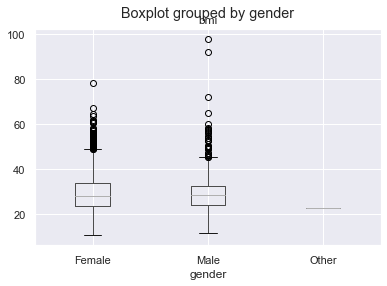

In [40]:
dataset.boxplot(column="bmi",by = "gender")
plt.show()

#### We get different BMI averages for women and men, although not very large. I will assign the total BMI mean as there are very few examples for the Others gender.

In [41]:
print("Mean of BMI value for Females: ", np.mean(dataset[dataset['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(dataset[dataset['gender'] == 'Male']['bmi']))
print("Mean of BMI value for Others: ", np.mean(dataset['bmi']))

Mean of BMI value for Females:  29.03592605510986
Mean of BMI value for Males:  28.594683544303777
Mean of BMI value for Others:  28.854614908114822


#### I filled null values with 0.

In [42]:
dataset['bmi'] = dataset['bmi'].fillna(0)

In [43]:
for i in range(0,5035):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.594683544303823
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.035926055109936
        else:
            dataset['bmi'][i] = 28.854652338161664

In [44]:
#testing null values in any attributes now
dataset[dataset['bmi'].isnull()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

---

<a id="18"></a> 
# 7. Encoding

#### First, we will handle Categorical Values.

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
print("Unique Values for Gender", dataset['gender'].unique())
print("Unique Values for ever_married", dataset['ever_married'].unique())
print("Unique Values for work_type", dataset['work_type'].unique())
print("Unique Values for Residence_type", dataset['Residence_type'].unique())
print("Unique Values for smoking_status", dataset['smoking_status'].unique())

Unique Values for Gender ['Female' 'Male' 'Other']
Unique Values for ever_married ['No' 'Yes']
Unique Values for work_type ['Private' 'children' 'Govt_job' 'Self-employed' 'Never_worked']
Unique Values for Residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'Unknown' 'never smoked' 'smokes']


<a id="19"></a> 
## Label Encoding

#### Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [46]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)

In [47]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)

<a id="20"></a> 
## One-Hot Encoding

#### One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

#### One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

#### In this part, we converted categorical datas to the binary values. This operation increases the accuracy.


In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()

In [49]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

gender_encoded_Female  gender_encoded_Male  gender_encoded_Other
0                         1                    0                     0
1                         1                    0                     0
2                         0                    1                     0
3                         1                    0                     0
4                         1                    0                     0
...                     ...                  ...                   ...
5030                      1                    0                     0
5031                      1                    0                     0
5032                      1                    0                     0
5033                      1                    0                     0
5034                      1                    0                     0

[5035 rows x 3 columns]

In [50]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

work_type_encoded_Govt_job  work_type_encoded_Never_worked  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
5030                           0                               0   
5031                           0                               0   
5032                           0                               0   
5033                           0                               0   
5034                           0                               0   

      work_type_encoded_Private  work_type_encoded_Self-employed  \
0                             1                                0   
1                             0                                0   
2                             1                                0   
3                             1                                0   
4                             1                                0   
...                         ...                              ...   
5030                          1                                0   
5031                          1                                0   
5032                          1                                0   
5033                          1                                0   
5034                          0                                0   

      work_type_encoded_children  
0                              0  
1                              1  
2                              0  
3                              0  
4                              0  
...                          ...  
5030                           0  
5031                           0  
5032                           0  
5033                           0  
5034                           1  

[5035 rows x 5 columns]

In [51]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

smoking_status_encoded_Unknown  smoking_status_encoded_formerly smoked  \
0                                  0                                       1   
1                                  1                                       0   
2                                  0                                       0   
3                                  0                                       0   
4                                  1                                       0   
...                              ...                                     ...   
5030                               0                                       0   
5031                               1                                       0   
5032                               0                                       1   
5033                               1                                       0   
5034                               1                                       0   

      smoking_status_encoded_never smoked  smoking_status_encoded_smokes  
0                                       0                              0  
1                                       0                              0  
2                                       1                              0  
3                                       1                              0  
4                                       0                              0  
...                                   ...                            ...  
5030                                    0                              1  
5031                                    0                              0  
5032                                    0                              0  
5033                                    0                              0  
5034                                    0                              0  

[5035 rows x 4 columns]

In [52]:
dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [53]:
dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

age  hypertension  heart_disease  ever_married  Residence_type  \
0     17.0             0              0             0               1   
1     13.0             0              0             0               0   
2     55.0             0              0             1               1   
3     42.0             0              0             0               1   
4     31.0             0              0             0               1   
...    ...           ...            ...           ...             ...   
5030  57.0             1              0             1               0   
5031  19.0             0              0             0               1   
5032  45.0             0              0             1               1   
5033  53.0             1              0             1               1   
5034   2.0             0              0             0               1   

      avg_glucose_level        bmi  stroke  gender_encoded_Female  \
0                 92.97  29.035926       0                      1   
1                 85.81  18.600000       0                      1   
2                 89.17  31.500000       0                      0   
3                 98.53  18.500000       0                      1   
4                108.89  52.300000       0                      1   
...                 ...        ...     ...                    ...   
5030             129.54  60.900000       0                      1   
5031              90.57  24.200000       0                      1   
5032             172.33  45.300000       0                      1   
5033              62.55  30.300000       1                      1   
5034             102.92  17.600000       0                      1   

      gender_encoded_Male  gender_encoded_Other  work_type_encoded_Govt_job  \
0                       0                     0                           0   
1                       0                     0                           0   
2                       1                     0                           0   
3                       0                     0                           0   
4                       0                     0                           0   
...                   ...                   ...                         ...   
5030                    0                     0                           0   
5031                    0                     0                           0   
5032                    0                     0                           0   
5033                    0                     0                           0   
5034                    0                     0                           0   

      work_type_encoded_Never_worked  work_type_encoded_Private  \
0                                  0                          1   
1                                  0                          0   
2                                  0                          1   
3                                  0                          1   
4                                  0                          1   
...                              ...                        ...   
5030                               0                          1   
5031                               0                          1   
5032                               0                          1   
5033                               0                          1   
5034                               0                          0   

      work_type_encoded_Self-employed  work_type_encoded_children  \
0                                   0                           0   
1                                   0                           1   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   
...                               ...                         ...   
5030                                0                           

#### **Now, we don't have categorical variables. Dataset is ready for Machine Leraning algorithms.**

---

<a id="21"></a> 
# 8. Train - Test Split

In [54]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import normalize

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
# print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in test dataset: 1007


#### Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [57]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Saving the scaler object

In [58]:
import pickle
import os
scaler_path = os.path.join('C:\\Users\\msn21\\Desktop\\Major Project\\Stroke-Local\\','models\\scaler1.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

print("Saved scaler object")

Saved scaler object


---

<a id="22"></a> 
# 9. Training & Scores of Models

#### These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [59]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
#   score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}') #not needed
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

#   validation_score = model.score(X_valid, y_valid)
#   print(f'Validation score of trained model: {validation_score*100}')
#   validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]


  accuracy  = (tp + tn) / (tp + fp + tn + fn)
    
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
#   print(f'Precision: {precision}')
#   print(f'Recall   : {recall}')
#   print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test) 
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true' 
#   print(preds) # this list contains 831 values test values predictions by the model
#   print(confusion_matr) #confusion matrix for the test set by that particular model
  print("*********************************************************************************************")
  print("")
  print("")

GaussianNB
Train score of trained model: 17.9493545183714
Test score of trained model: 18.17279046673287
 
Confussion Matrix: 
[[145   1]
 [823  38]]

Accuracy : 0.1817279046673287
Specificity : 0.9931506849315068

Classification Report: 
              precision    recall  f1-score   support

           0       0.15      0.99      0.26       146
           1       0.97      0.04      0.08       861

    accuracy                           0.18      1007
   macro avg       0.56      0.52      0.17      1007
weighted avg       0.85      0.18      0.11      1007



*********************************************************************************************


BernoulliNB
Train score of trained model: 95.72989076464746
Test score of trained model: 95.8291956305859
 
Confussion Matrix: 
[[965  39]
 [  3   0]]

Accuracy : 0.958291956305859
Specificity : 0.9611553784860558

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.9

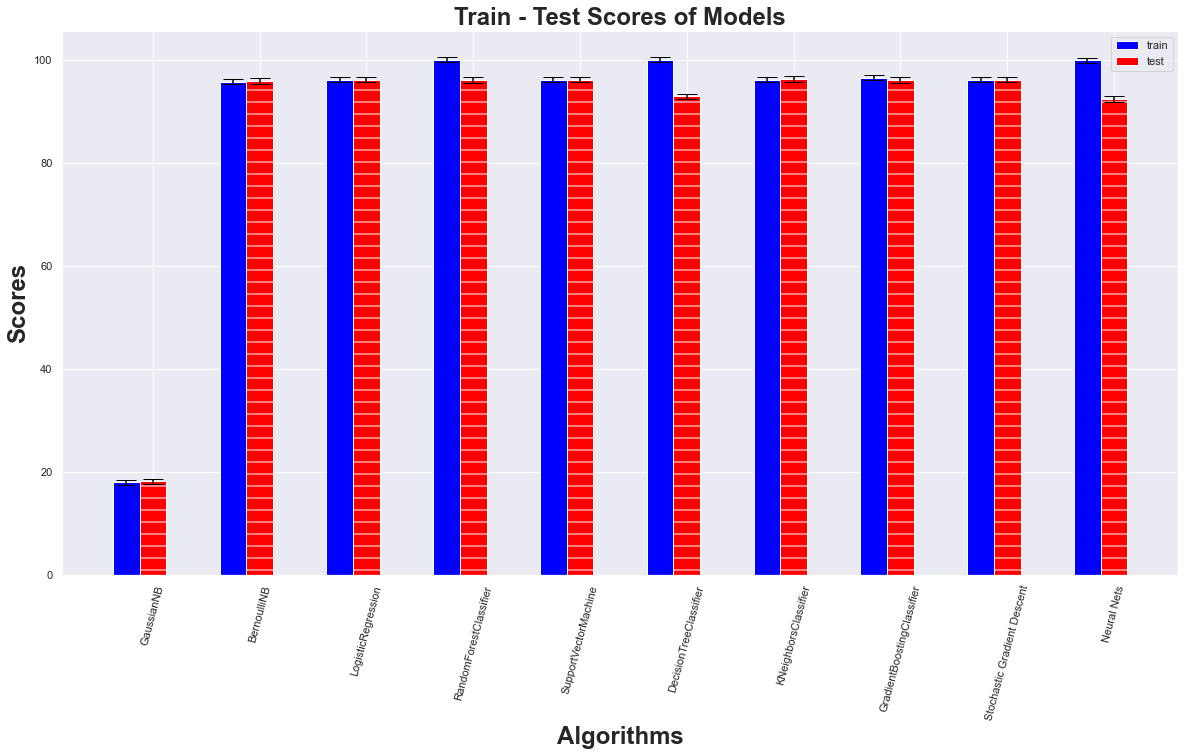

In [78]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
# plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)
plt.title('Train - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
# bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [61]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 18.17279046673287
Accuracy of BernoulliNB -----> 95.8291956305859
Accuracy of LogisticRegression -----> 96.1271102284012
Accuracy of RandomForestClassifier -----> 96.02780536246276
Accuracy of SupportVectorMachine -----> 96.1271102284012
Accuracy of DecisionTreeClassifier -----> 92.85004965243296
Accuracy of KNeighborsClassifier -----> 96.22641509433963
Accuracy of GradientBoostingClassifier -----> 96.02780536246276
Accuracy of Stochastic Gradient Descent -----> 96.1271102284012
Accuracy of Neural Nets -----> 92.35352532274081


#### The Highest is the *"Accuracy of KNeighborsClassifier -----> 96.22641509433963"*

---

<a id="23"></a> 
# 10. Evaluation of Models

#### We evaluated these models according to their accuracies. Best algorithm is KNN with 96.03%. So, we will make k-Fold Cross Validation and Hyper-Parameter Optimization for KNN algorithm.

In [62]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_score = knn_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')
test_score = knn_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

Train score of trained model: 0.9612711022840119
Test score of trained model: 0.9622641509433962
Accuracy: 96.22641509433963

Confussion matrix: 
[[968  38]
 [  0   1]]



## Saving the best model prediction

In [63]:
import joblib

model_path = os.path.join('C:\\Users\\msn21\\Desktop\\Major Project\\Stroke-Local\\','models\\knn.sav')

joblib.dump(knn_model,model_path)    
print("Saved knn_model") #***************************************************************

Saved knn_model


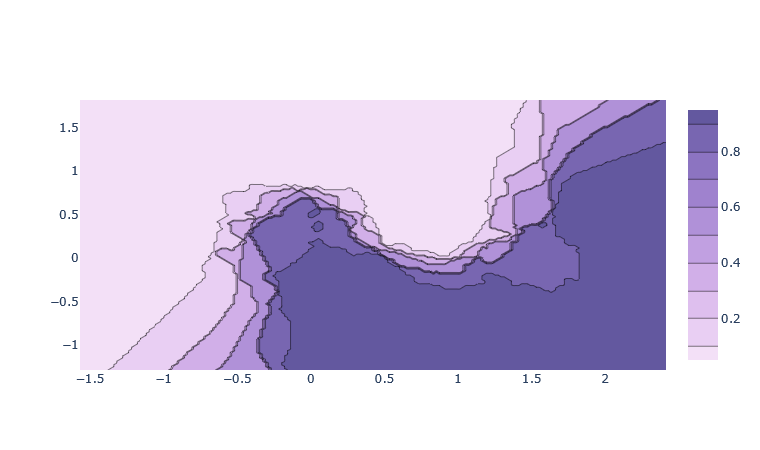

In [64]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.2, random_state=3) 
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = knn_model
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='purp'
    )
])
fig.show()

<a id="24"></a> 
## k-Fold Cross Validation

### Cross Validation will enable us to see whether we are facing an overfitting problem and also to see the quality of our model. Thus, it will enable us to test the performance of our model before encountering high error rates in the test data set that we have not seen yet. It is a method that is frequently used because it is easy to apply.

***cv = 10 means k = 10 for KNN.***

In [65]:
print(cross_val_score(knn_model, X = X_train, y = y_train, cv = 10))

[1.    0.875 1.    1.    0.75  1.    1.    0.875 0.875 1.   ]


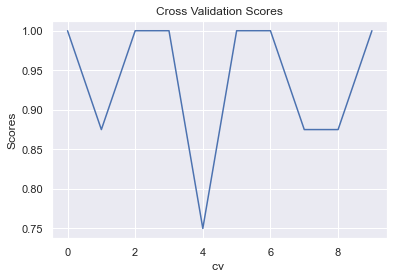

In [66]:
g = cross_val_score(knn_model, X = X_train, y = y_train, cv = 10)
plt.title("Cross Validation Scores")
plt.xlabel("cv ")
plt.ylabel("Scores")
plt.plot(g)

In [67]:
accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean):", accuracies.mean()*100, "%")
print("std: ", accuracies.std()*100)

Accuracy (mean): 93.75 %
std:  8.38525491562421


In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as: 

Source: https://en.wikipedia.org/wiki/Mean_absolute_error

In [68]:
scores = cross_val_score(knn_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
print ("MAE:", scores.mean())

MAE: -0.0625


<a id="25"></a> 
## Hyper-Parameter Optimization

#### Unlike parameters, hyperparameters are not learned during training the model. They are determined by the data scientist before the modeling phase. For example, KNN algorithm, which is one of the non-parametric classification algorithms, makes classification by looking at the nearest k neighbors to the desired value. Here, the k number (n_neighbors:) and the distance metric (metric:) to be used are the hyperparameters that should be specified by the data scientist before the modeling, which increases the performance of the model.

**Hyperparameter optimization** is the process of finding the most suitable hyperparameter combination according to the success metric specified for a machine learning algorithm.

#### Given that there are dozens of hyperparameters for a machine learning algorithm and dozens of values these hyperparameters can take, it's clear how difficult it will be to try all combinations one by one and pick the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearcCV and RandomizedSearchCV are among these methods.

<a id="26"></a> 
### **GridSearchCV**

#### For the hyperparameters and their values that are desired to be tested in the model, a separate model is established with all combinations and the most successful hyperparameter set is determined according to the specified metric.

In [69]:
parameters = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [70]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 95.0
GridSearchView Best Estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=3)
GridSearchView Best Params: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


<a id="27"></a> 
### **RandomizedSearchCV**

#### A set of hyperparameters is randomly selected and tested by cross-validation and the model set up. These steps continue until the specified calculation time limit or the number of iterations is reached.

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

randomizedcv = RandomizedSearchCV(knn_model, params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [72]:
print(f'RandomizedSearchCV Best Score: {randomizedcv.best_score_*100}')
print(f'RandomizedSearchCV Best Estimator: {randomizedcv.best_estimator_}')
print(f'RandomizedSearchCV Best Params: {randomizedcv.best_params_}')

RandomizedSearchCV Best Score: 95.0
RandomizedSearchCV Best Estimator: KNeighborsClassifier(n_neighbors=3)
RandomizedSearchCV Best Params: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski', 'algorithm': 'auto'}


---

<a id="28"></a> 
## Best Features Selection

#### Feature Importance and Best Features

In [73]:
# I wrote this part again because X y changed above, in the k-nn visualization. 
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in validation dataset: 503
Total # of sample in test dataset: 504


RandomForestClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




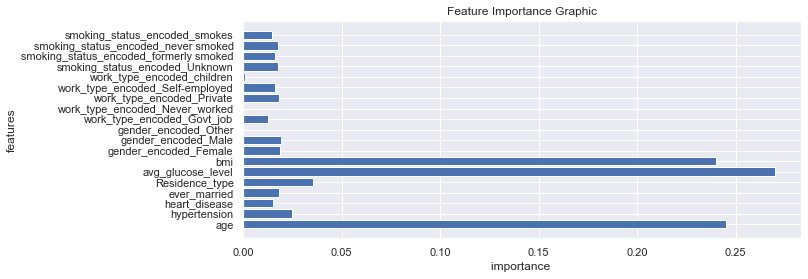

DecisionTreeClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




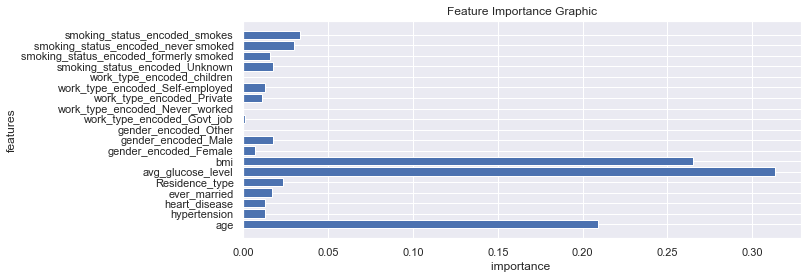

GradientBoostingClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




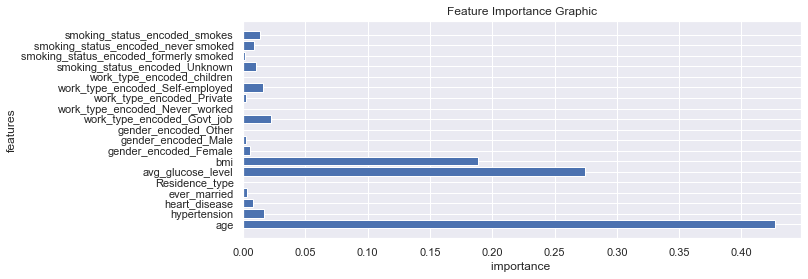

In [74]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'])
  plt.show()

In [75]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (5035, 19) New shape: (5035, 7)


LogisticRegression
Old Shape: (5035, 19) New shape: (5035, 10)


Stochastic Gradient Descent
Old Shape: (5035, 19) New shape: (5035, 7)




---

<a id="29"></a> 
# Conclusion

In this notebook, We examined Stroke Prediction Dataset. We analyzed the dataset then, tested various ML algorithms for the one with best accuracy. We saved it for using with GUI for providing prediction to the user for chances of stroke to him; based on the data provided by him/her using GUI 

* ***Thank you.***

In [76]:
jnsdjk

NameError: name 'jnsdjk' is not defined

In [ ]:
#6:37

- Accuracy of GaussianNB -----> 18.46031746031746
- Accuracy of BernoulliNB -----> 90.72222222222223
- Accuracy of LogisticRegression -----> 91.8555555555556
- Accuracy of RandomForestClassifier -----> 93.63492063492063
- Accuracy of SupportVectorMachine -----> 92.46031746031746
- Accuracy of DecisionTreeClassifier -----> 92.06349206349206
- Accuracy of KNeighborsClassifier -----> 96.03174603174604
- Accuracy of GradientBoostingClassifier -----> 94.63492063492063
- Accuracy of Stochastic Gradient Descent -----> 94.83333333333334
- Accuracy of Neural Nets -----> 93.05555555555556